In [ ]:
# 25BuyAndHoldStrategy: ripetere quello che ho fatto io a lezione con un altro strumento finanziario, 
# commentando le metriche ottenute come ho fatto io durante la lezione. Scrivete i commenti dentro al file Jupyter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [5]:
import tpqoa
api = tpqoa.tpqoa("oanda.cfg")

In [6]:
df = api.get_history(instrument = "EUR_HUF", start = "2008-10-10", end = "2021-10-01", granularity = "D", price = "B")

In [7]:
df.head() # open, high, low, close

,o,h,l,c,volume,complete
time,,,,,,
2008-10-09 21:00:00,263.944,272.135,254.860,256.250,27515,True
2008-10-10 21:00:00,256.250,256.250,256.250,256.250,4,True
2008-10-11 21:00:00,256.259,256.260,255.705,255.705,99,True
2008-10-12 21:00:00,255.705,256.250,250.125,251.250,22353,True
2008-10-13 21:00:00,251.250,253.700,246.875,253.250,25473,True


In [8]:
#  guardare e scoprire se ci sono settimane col valore NA e fare qualcosa con questi NA
isNAN = df.isnull()
NANrows = isNAN.any(axis=1)
selectNAN = df[NANrows]
print(selectNAN)

Empty DataFrame
Columns: [o, h, l, c, volume, complete]
Index: []


In [9]:
df=df.c.to_frame()

In [10]:
df.head(30)

,c
time,
2008-10-09 21:00:00,256.250
2008-10-10 21:00:00,256.250
2008-10-11 21:00:00,255.705
2008-10-12 21:00:00,251.250
2008-10-13 21:00:00,253.250
2008-10-14 21:00:00,270.500
2008-10-15 21:00:00,264.100
2008-10-16 21:00:00,262.800
2008-10-18 21:00:00,262.962


In [11]:
# returns
df["returns"]=np.log(df/df.shift(1))

In [12]:
df.head()

,c,returns
time,,
2008-10-09 21:00:00,256.250,NaN
2008-10-10 21:00:00,256.250,0.000000
2008-10-11 21:00:00,255.705,-0.002129
2008-10-12 21:00:00,251.250,-0.017576
2008-10-13 21:00:00,253.250,0.007929


In [13]:
df.dropna(inplace=True) 

In [14]:
df.head()

,c,returns
time,,
2008-10-10 21:00:00,256.250,0.000000
2008-10-11 21:00:00,255.705,-0.002129
2008-10-12 21:00:00,251.250,-0.017576
2008-10-13 21:00:00,253.250,0.007929
2008-10-14 21:00:00,270.500,0.065895


## Strategia Buy and hold

<AxesSubplot:ylabel='Frequency'>

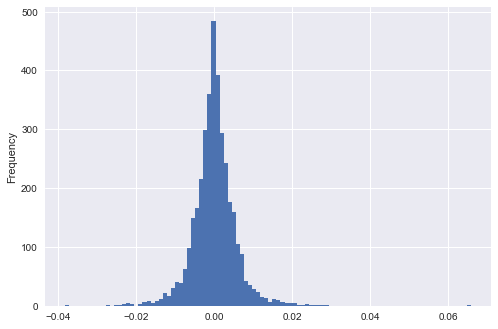

In [15]:
df["returns"].plot(kind="hist", bins=100)

In [ ]:
#Il grafico è quasi simmetrico, ma si vede una preponderanza al lato destro, che significa che la valuta
#ungherese ha guadagnato valore dal 2008, quindi i rendimenti sono positivi. 

In [16]:
df.returns.sum()

0.332268290458157

In [ ]:
#il risultato del sum conferma quello che si vede nel grafica sopra. 

Se vogliamo vedere come è diventato 1 dollaro comprato a inizio periodo, dato che $${\text LR}= \log \frac{P_{fine}}{P_{inizio}} \ \ \ \ \ \   \exp^{\text LR}= \frac{P_{fine}}{P_{inizio}}  \ \ \ \ \ \   P_{fine}=P_{inizio}\cdot \exp^{\text LR}$$

In [17]:
pfinale = 1*np.exp(df.returns.sum())
print(pfinale)
#se il forint fosse stato equivalente all-euro nel 2008, oggi sarebbe equivalente al 1.39 euro

1.3941268292682925


In [18]:
#adesso calcoliamao per ogni giorno il log return dallinizio del periodo fino a quel giorno li. 

In [19]:
df["cumlogret"]=df.returns.cumsum()
df["valore1HUF"]=df.returns.cumsum().apply(np.exp)

In [20]:
df.head()

,c,returns,cumlogret,valore1HUF
time,,,,
2008-10-10 21:00:00,256.250,0.000000,0.000000,1.000000
2008-10-11 21:00:00,255.705,-0.002129,-0.002129,0.997873
2008-10-12 21:00:00,251.250,-0.017576,-0.019705,0.980488
2008-10-13 21:00:00,253.250,0.007929,-0.011776,0.988293
2008-10-14 21:00:00,270.500,0.065895,0.054119,1.055610


In [21]:
df.head()

,c,returns,cumlogret,valore1HUF
time,,,,
2008-10-10 21:00:00,256.250,0.000000,0.000000,1.000000
2008-10-11 21:00:00,255.705,-0.002129,-0.002129,0.997873
2008-10-12 21:00:00,251.250,-0.017576,-0.019705,0.980488
2008-10-13 21:00:00,253.250,0.007929,-0.011776,0.988293
2008-10-14 21:00:00,270.500,0.065895,0.054119,1.055610


In [22]:
df.describe()

,c,returns,cumlogret,valore1HUF
count,3718.000000,3718.000000,3718.000000,3718.000000
mean,303.888292,0.000089,0.166947,1.185906
std,25.832228,0.005555,0.084136,0.100809
min,251.250000,-0.038076,-0.019705,0.980488
25%,282.664250,-0.002609,0.098106,1.103080
50%,306.455000,0.000000,0.178917,1.195922
75%,315.165750,0.002701,0.206945,1.229915
max,368.371000,0.065895,0.362937,1.437545


In [ ]:
#Dalla tabellina sopra se vede che il massimo di valore perso in un giorno è 3.8% e il massimo che 
#ha guadagnato in valore in un giorno è 6,5%, in numeri assoluti si vede che la conversione al euro è più
#oscillante in rispetto al EUR_USD. La media del ritorno è positiva, quindi conferma la tendenza della valuta a guadagnare 
#in valore.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3718 entries, 2008-10-10 21:00:00 to 2021-09-30 21:00:00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   c           3718 non-null   float64
 1   returns     3718 non-null   float64
 2   cumlogret   3718 non-null   float64
 3   valore1HUF  3718 non-null   float64
dtypes: float64(4)
memory usage: 145.2 KB


<AxesSubplot:xlabel='time'>

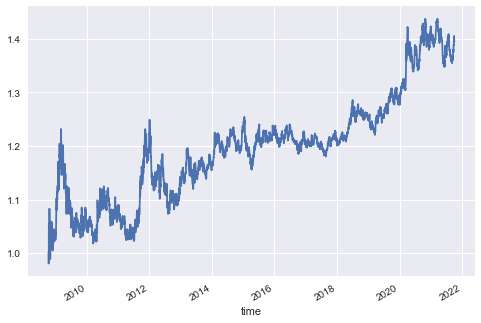

In [24]:
df.valore1HUF.plot()

In [ ]:
#Confermando l'analise fatta sopra, il forint ha guardagnato valore, sopratutto dal 2015.
#non senza pero' un po' di oscillazione, sopratutto all'inizio del periodo

## Metriche di performance - Performance metrics

In [25]:
#rendimento medio giornaliero
print(df.returns.mean())
#rendimento mediano giornaliero
print(df.returns.median())
#volatilita sui rendimenti giornalieri, alias standard deviation
print(df.returns.std())
#rendimento assoluto sulla base LOGARITMICA, sui 13 anni
print(df.cumlogret[-1])

8.936747995109138e-05
0.0
0.005555422800596214
0.33226829045815776


In [26]:
#rendimento medio annualizzato
print(df.returns.mean()*250)

#mediana annualizzata
print(df.returns.median()*250)

#volatilita annualizata a base dei rendimenti giornalieri
print(df.returns.std()*np.sqrt(250))

0.022341869987772843
0.0
0.08783894707557731


In [ ]:
#La volatilità per questo periodo di 13 anni è praticamente la stessa del dolar, pero' il rendimento del annualizzato del forint
#è positivo al 2,2%, invece dal dollar que perde valore al quase 1%.

In [27]:
# Prossimo passo: rendimento assoluto annualizzato  sui 13 anni

# 1. quanti giorni di trading ci furono?
daysproportion = 250/len(df)  #dividere i giorni lanno del mercato finanziario per linsieme di giorni del DF

#2. Calcolare rendimento assoluto al giorno  
print(df.cumlogret[-1]*daysproportion) 
#uguale al rendimento medio annualizzato sopra calcolato
#altra procedura ammessa:
print(df.cumlogret[-1]*365/(df.index[-1]-df.index[0]).days)
print(type(df.index[0]))

0.022341869987772846
0.025596860704353647
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


### Massimo drawdown

In [ ]:
#differenza tra il massimo raggiunto nel passato e il prezzo che ha raggiunto nel presente. se è zero vuol dire che il prezzo 
#di adesso è il massimo

In [28]:
df.head(30)

,c,returns,cumlogret,valore1HUF
time,,,,
2008-10-10 21:00:00,256.250,0.000000,0.000000e+00,1.000000
2008-10-11 21:00:00,255.705,-0.002129,-2.129094e-03,0.997873
2008-10-12 21:00:00,251.250,-0.017576,-1.970507e-02,0.980488
2008-10-13 21:00:00,253.250,0.007929,-1.177639e-02,0.988293
2008-10-14 21:00:00,270.500,0.065895,5.411857e-02,1.055610
2008-10-15 21:00:00,264.100,-0.023944,3.017429e-02,1.030634
2008-10-16 21:00:00,262.800,-0.004935,2.523976e-02,1.025561
2008-10-18 21:00:00,262.962,0.000616,2.585600e-02,1.026193
2008-10-19 21:00:00,269.550,0.024744,5.060037e-02,1.051902


Il drawdown è la differenza tra il massimo cumulato del rendimento cumulato e il rendimento cumulato stesso. Rappresenta il massimo guadagno che abbiamo potenzialmente raggiunto meno il rendimento attuale.

In [29]:
#rendimento cumulativo logaritmico massimo 
# il massimo che avrei potuto guadagnare
df["cumlogretmax"] = df.cumlogret.cummax()  #funzione cummax mi ritorno una serie e non nummero

In [30]:
df.head(13)

,c,returns,cumlogret,valore1HUF,cumlogretmax
time,,,,,
2008-10-10 21:00:00,256.250,0.000000,0.000000,1.000000,0.000000
2008-10-11 21:00:00,255.705,-0.002129,-0.002129,0.997873,0.000000
2008-10-12 21:00:00,251.250,-0.017576,-0.019705,0.980488,0.000000
2008-10-13 21:00:00,253.250,0.007929,-0.011776,0.988293,0.000000
2008-10-14 21:00:00,270.500,0.065895,0.054119,1.055610,0.054119
2008-10-15 21:00:00,264.100,-0.023944,0.030174,1.030634,0.054119
2008-10-16 21:00:00,262.800,-0.004935,0.025240,1.025561,0.054119
2008-10-18 21:00:00,262.962,0.000616,0.025856,1.026193,0.054119
2008-10-19 21:00:00,269.550,0.024744,0.050600,1.051902,0.054119


<AxesSubplot:xlabel='time'>

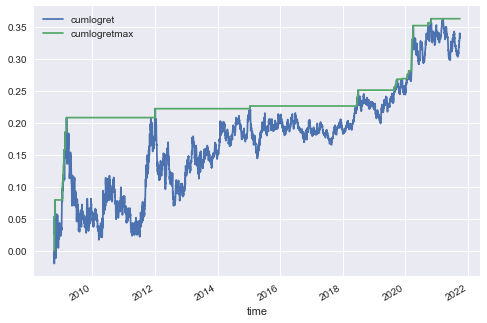

In [31]:
df[["cumlogret", "cumlogretmax"]].plot()
#drawdown eh la differenza tra rigga verde e riga blue. tra il massimo che ho raggiunto fino aquel momento come rendimento
#e il rendimento attuale. il massimo di rendimento cumulato considerato allinizio fino a quel momento. 

In [32]:
drawdown=df.cumlogretmax-df.cumlogret
drawdown.max()

0.19087665403378618

In [ ]:
# dato che il drawdown rappresenta il massimo guardagno che abbiamo potenzialmente raggiunto considerato dall'inizio 
#fino a quel momento  la situazione attual e che però abbiamo una SERIE di valore, cioè un valore per ogni giorno del DF, 
# il commando sopra drawdown.max trova il valore massimo di tutta questa serie di valore.
# Il massimo rendimento potenzialmente raggiunto con la valuta forint nell'intervalo di 13 anni tra 
#sarebbe il 36%, che è quase lo stesso dal dollar. 

In [33]:
drawdown.idxmax()
#Questo guardagno potrebbe essere stato raggiunto nel giorno 19 di dicembre di 2016.

Timestamp('2010-03-16 21:00:00')

In [ ]:
# observations
# cancellare prima riga? 2008-10-10 21:00:00	256.250	0.000000	0.000000	1.000000